# Data Cleaning - Main Dataset
## Energy consumption in France

Energy Consumption in France Dataset

Provider: RTE (French electricity transmission system operator)

Frequency: Updated daily

Temporal granularity: Quarter-hourly to half-hourly

Geographic coverage: Entire territory of France

Depth of history: January 2012 to M-1 (previous month)

Contents:

The Energy Consumption in France dataset contains the following information:

    Hourly data on electricity consumption
    Production data from different energy sources
    Energy exchanges with neighboring countries
    Estimate of carbon emissions generated by electricity production in France

This dataset provides a comprehensive look at the energy consumption and production in France, including information on the sources of energy used and the carbon emissions generated. With data updated daily and a depth of history dating back to 2012, it is a valuable resource for understanding energy trends in France.

## Libraries

In [73]:
# importing libraries for data cleaning and analysis :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the data

In [74]:
# importing the dataset :

df = pd.read_csv('eco2mix-national-cons-def.csv', sep=';')
df.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2013-05-21,15:45,2013-05-21T15:45:00+02:00,NaN,56350,57800,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France,Données définitives,2013-05-21,16:45,2013-05-21T16:45:00+02:00,NaN,54550,55750,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2013-05-21,18:15,2013-05-21T18:15:00+02:00,NaN,54000,55200,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,France,Données définitives,2013-05-21,18:45,2013-05-21T18:45:00+02:00,NaN,54550,55900,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2013-05-21,19:30,2013-05-21T19:30:00+02:00,58669.0,54000,55300,613.0,2002.0,...,-1.0,394,1125.0,88.0,7777.0,3616.0,2495.0,349.0,142.0,150.0


In [75]:
# checking the shape of the dataset :
df.shape

(365184, 37)

In [76]:
# checking the columns of the dataset :
df.columns

Index(['Périmètre', 'Nature', 'Date', 'Heure', 'Date et Heure',
       'Consommation (MW)', 'Prévision J-1 (MW)', 'Prévision J (MW)',
       'Fioul (MW)', 'Charbon (MW)', 'Gaz (MW)', 'Nucléaire (MW)',
       'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)',
       'Bioénergies (MW)', 'Ech. physiques (MW)', 'Taux de CO2 (g/kWh)',
       'Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)',
       'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)',
       'Ech. comm. Allemagne-Belgique (MW)', 'Fioul - TAC (MW)',
       'Fioul - Cogénération (MW)', 'Fioul - Autres (MW)', 'Gaz - TAC (MW)',
       'Gaz - Cogénération (MW)', 'Gaz - CCG (MW)', 'Gaz - Autres (MW)',
       'Hydraulique - Fil de l'eau + éclusée (MW)', 'Hydraulique - Lacs (MW)',
       'Hydraulique - STEP turbinage (MW)', 'Bioénergies - Déchets (MW)',
       'Bioénergies - Biomasse (MW)', 'Bioénergies - Biogaz (MW)'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365184 entries, 0 to 365183
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Périmètre                                  365184 non-null  object 
 1   Nature                                     365184 non-null  object 
 2   Date                                       365184 non-null  object 
 3   Heure                                      365184 non-null  object 
 4   Date et Heure                              365184 non-null  object 
 5   Consommation (MW)                          182592 non-null  float64
 6   Prévision J-1 (MW)                         365184 non-null  int64  
 7   Prévision J (MW)                           365184 non-null  int64  
 8   Fioul (MW)                                 182592 non-null  float64
 9   Charbon (MW)                               182592 non-null  float64
 10  Gaz (MW)

## Let's begin by Fixing the datetime because it's the most important feature

I have to choose wich column I am going to keep for our analysis between 'Date', 'Heure' (Hour) and 'Data et Heure'. These columns types need to be converted to datetime format. Also we need to fix it as index.

In [78]:
# Combine the "Date" and "Heure" columns into a new "Datetime" column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Heure'])

# Set the "Datetime" column as the index
#df.set_index('Datetime', inplace=True) # We will skip this step for now because it will make it harder to merge the datasets later on

# Drop the "Date" and "Heure" columns
df.drop(columns=['Date', 'Heure'], inplace=True)

# Check the first few rows of the DataFrame
print(df.head())

  Périmètre               Nature              Date et Heure  \
0    France  Données définitives  2013-05-21T15:45:00+02:00   
1    France  Données définitives  2013-05-21T16:45:00+02:00   
2    France  Données définitives  2013-05-21T18:15:00+02:00   
3    France  Données définitives  2013-05-21T18:45:00+02:00   
4    France  Données définitives  2013-05-21T19:30:00+02:00   

   Consommation (MW)  Prévision J-1 (MW)  Prévision J (MW)  Fioul (MW)  \
0                NaN               56350             57800         NaN   
1                NaN               54550             55750         NaN   
2                NaN               54000             55200         NaN   
3                NaN               54550             55900         NaN   
4            58669.0               54000             55300       613.0   

   Charbon (MW)  Gaz (MW)  Nucléaire (MW)  ...  Gaz - Cogénération (MW)  \
0           NaN       NaN             NaN  ...                      NaN   
1           NaN       NaN 

In [79]:
df.index

RangeIndex(start=0, stop=365184, step=1)

In [80]:
# We can drop "Date et Heure" column as we have already created a new column "Datetime" with the same information :
df.drop(columns=['Date et Heure'], inplace=True)

In [82]:
# Creating "Year", "Month", "Day", "Weekday" "Hour" columns from "Datetime" column : 
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Weekday'] = df['Datetime'].dt.weekday
df['Hour'] = df['Datetime'].dt.hour

In [84]:
# Putting the "Datetime", "Year", "Month", "Day" and "Hour" columns at the beginning of the DataFrame :
df = df.reindex(columns=['Datetime','Year', 'Month', 'Day', 'Hour','Weekday'] + list(df.columns[:-6]))

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365184 entries, 0 to 365183
Data columns (total 40 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   Datetime                                   365184 non-null  datetime64[ns]
 1   Year                                       365184 non-null  int64         
 2   Month                                      365184 non-null  int64         
 3   Day                                        365184 non-null  int64         
 4   Hour                                       365184 non-null  int64         
 5   Weekday                                    365184 non-null  int64         
 6   Périmètre                                  365184 non-null  object        
 7   Nature                                     365184 non-null  object        
 8   Consommation (MW)                          182592 non-null  float64       
 9   Prév

In [86]:
df.shape

(365184, 40)

In [87]:
df.head(5)

,Datetime,Year,Month,Day,Hour,Weekday,Périmètre,Nature,Consommation (MW),Prévision J-1 (MW),...,Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,2013-05-21 15:45:00,2013,5,21,15,1,France,Données définitives,NaN,56350,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-05-21 16:45:00,2013,5,21,16,1,France,Données définitives,NaN,54550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-05-21 18:15:00,2013,5,21,18,1,France,Données définitives,NaN,54000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-05-21 18:45:00,2013,5,21,18,1,France,Données définitives,NaN,54550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-05-21 19:30:00,2013,5,21,19,1,France,Données définitives,58669.0,54000,...,-1.0,394,1125.0,88.0,7777.0,3616.0,2495.0,349.0,142.0,150.0


1) We need explore the data and drop some useless colunms to make the analysis easier.
2) We need to fix the data types of some columns, for example the date and time features to datetime.

## Dropping Columns (low variance columns)

In [88]:
# checking the values of 'Périmètre' column :
df['Périmètre'].unique()

array(['France'], dtype=object)

In [89]:
# We can drop this column as it has only one value :

df.drop('Périmètre', axis=1, inplace=True)

In [90]:
# checking the values of 'Nature' column :
df['Nature'].unique()

array(['Données définitives', 'Données consolidées'], dtype=object)

The column nature means the nature of the data collected of the energy consumption (MW).In the context of this dataset, "données consolidées" refers to the hourly energy consumption data that has been verified and completed by the data providers. The data is considered consolidated when it has been reviewed and supplemented by the providers and is delivered in the middle of the following month (M+1).

On the other hand, "données définitives" refer to the same hourly energy consumption data that has been transmitted and verified by all the partners involved in the data collection process. The data is considered final when all the partners have transmitted and verified their counts, and it is delivered in the second half of the following year (A+1).

In summary, "données consolidées" are verified and supplemented by the providers, while "données définitives" are verified and validated by all the partners involved in the data collection process.

The issue is that "données définitives" stop in 2020, and we want to keep the data to build the best model. I've made some research and I saw that there is not a big difference between the value. So I decided the keep both data natures. 

In [91]:
# dropping the column "Nature" as it has 2 values and we will be using both of them :

df.drop('Nature', axis=1, inplace=True)

"Prévision J (MW)" & "Prévision J-1 (MW)" column correspond to the forecasted energy consumption by RTE in D-1 and D. But in this project we don't need them as features. We want to make our oun prediction based on other features.

In [92]:
# dropping "Prévision J (MW)" & "Prévision J-1 (MW)" :

df.drop(['Prévision J (MW)', 'Prévision J-1 (MW)'], axis=1, inplace=True)

## Dropping useless rows

In our dataset, the temporal granularity is quarter-hourly to half-hourly. But the quarter-hourly rows are empty so we can drop them. So the temporal granularity will be half-hourly.

In [93]:
# counting the number of null values in "Consommation (MW)" column :
df['Consommation (MW)'].isnull().sum()

182592

In [94]:
# dropping the null values in "Consommation (MW)" column :
df.dropna(subset=['Consommation (MW)'], inplace=True)

In [95]:
# checking the shape of the dataset :
df.shape

(182592, 36)

Now, the temporal granularity of our dataset is half-hourly. We will see in the futur if we need to change it to a hourly temporal granularity.

## Fixing Data types

In [96]:
# Checking data types of the columns :
df.dtypes

Datetime                                     datetime64[ns]
Year                                                  int64
Month                                                 int64
Day                                                   int64
Hour                                                  int64
Weekday                                               int64
Consommation (MW)                                   float64
Fioul (MW)                                          float64
Charbon (MW)                                        float64
Gaz (MW)                                            float64
Nucléaire (MW)                                      float64
Eolien (MW)                                         float64
Solaire (MW)                                        float64
Hydraulique (MW)                                    float64
Pompage (MW)                                        float64
Bioénergies (MW)                                    float64
Ech. physiques (MW)                     

In [97]:
# Checking the values of "Ech. comm. Allemagne-Belgique (MW)" :
df['Ech. comm. Allemagne-Belgique (MW)'].unique()

array(['-1077', '-963', '-1763', ..., 6974.0, -5775.0, -5563.0],
      dtype=object)

In [98]:
# Checking the values of "Gaz - Cogénération (MW)" :
df['Gaz - Cogénération (MW)'].unique()

array([394.0, 393.0, 414.0, ..., 196.0, 184.0, 188.0], dtype=object)

The columns "Ech. comm. Allemagne-Belgique (MW)" and "Gaz - Cogénération (MW)" need to be converted to float.

Ech. comm. Allemagne-Belgique (MW)            object

Gaz - Cogénération (MW)                       object

After checking the values in excel we can see that there are some values which are not numeric ("ND") in "Ech. comm. Allemagne-Belgique (MW)" and "Gaz - Cogénération (MW)" columns. That's why they are in 'object'.


In [99]:
# counting the values equal to "ND" in "Ech. comm. Allemagne-Belgique (MW)" column :

df['Ech. comm. Allemagne-Belgique (MW)'].str.contains('ND').sum()

28

In [100]:
# counting the values equal to "ND" in "Gaz - Cogénération (MW)" column :

df['Gaz - Cogénération (MW)'].str.contains('ND').sum()

17569

There are few rows (28) affected by "ND" values in the column 'Ech. comm. Germany-Belgium (MW)' but many (17569) in the column 'Gas - CHP (MW)', which corresponds to the whole year 2012.
So I decided to replace NDs with NaNs because there are in "object". Then we can convert the columns to float and replace the NaNs by the median value of each column.

In [101]:
# Replacing "ND" values with NaNs in the specified columns
df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']] = df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']].replace('ND', np.nan)

# Converting the specified columns to float type
df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']] = df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']].astype(float)

# Replacing NaN values with median values for each column
df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']] = df[['Ech. comm. Allemagne-Belgique (MW)', 'Gaz - Cogénération (MW)']].fillna(df.median())

In [102]:
df.shape

(182592, 36)

In [104]:
# Whats the time range of the dataset ?

print('Start date: ', df['Datetime'].min())
print('End date: ', df['Datetime'].max())

Start date:  2012-01-01 00:00:00
End date:  2022-05-31 23:30:00


## Missing Values

In [105]:
# Checking the number of null values in each column :

df.isnull().sum()

Datetime                                         0
Year                                             0
Month                                            0
Day                                              0
Hour                                             0
Weekday                                          0
Consommation (MW)                                0
Fioul (MW)                                       0
Charbon (MW)                                     0
Gaz (MW)                                         0
Nucléaire (MW)                                   0
Eolien (MW)                                      0
Solaire (MW)                                     0
Hydraulique (MW)                                 0
Pompage (MW)                                     0
Bioénergies (MW)                                 0
Ech. physiques (MW)                              0
Taux de CO2 (g/kWh)                              0
Ech. comm. Angleterre (MW)                     632
Ech. comm. Espagne (MW)        

Checking the description of the columns with missing values.

In [106]:
cols = ['Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)', 'Fioul - TAC (MW)', 'Fioul - Cogénération (MW)', 'Fioul - Autres (MW)', 'Gaz - TAC (MW)', 'Gaz - CCG (MW)', 'Gaz - Autres (MW)', 'Hydraulique - Fil de l\'eau + éclusée (MW)', 'Hydraulique - Lacs (MW)', 'Hydraulique - STEP turbinage (MW)', 'Bioénergies - Déchets (MW)', 'Bioénergies - Biomasse (MW)', 'Bioénergies - Biogaz (MW)']

df[cols].describe()

,Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
count,181960.000000,182584.000000,182574.000000,182584.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000,165023.000000
mean,-1203.093993,-733.035962,-1991.642304,-1572.193861,28.819201,124.603982,98.032268,28.004442,2095.198978,79.821885,4683.050654,1852.435357,667.435509,484.770396,261.634445,254.294607
std,1069.008510,1604.527602,1022.033008,1334.765581,92.170652,73.818236,192.504168,85.926639,1831.812792,79.812060,1537.192793,1103.923511,744.601743,63.537709,67.689216,62.185910
min,-3028.000000,-3792.000000,-4317.000000,-3761.000000,-67.000000,14.000000,-13.000000,-10.000000,-18.000000,3.000000,1237.000000,43.000000,-2.000000,229.000000,111.000000,111.000000
25%,-2000.000000,-2075.000000,-2750.000000,-2731.000000,8.000000,71.000000,10.000000,-1.000000,241.000000,48.000000,3424.500000,1016.000000,11.000000,443.000000,212.000000,203.000000
50%,-1500.000000,-1100.000000,-2355.000000,-1888.000000,15.000000,85.000000,25.000000,3.000000,1628.000000,66.000000,4797.000000,1661.000000,398.000000,490.000000,273.000000,254.000000
75%,-909.000000,571.250000,-1206.000000,-601.000000,22.000000,198.000000,84.000000,9.000000,3764.000000,86.000000,5917.000000,2471.000000,1083.000000,532.000000,302.000000,312.000000
max,3013.000000,3838.000000,1205.000000,2100.000000,1628.000000,364.000000,3576.000000,662.000000,6500.000000,656.000000,8298.000000,7205.000000,4283.000000,702.000000,661.000000,448.000000


In [107]:
df[cols].isnull().sum() # checking the number of null values in each column

Ech. comm. Angleterre (MW)                     632
Ech. comm. Espagne (MW)                          8
Ech. comm. Italie (MW)                          18
Ech. comm. Suisse (MW)                           8
Fioul - TAC (MW)                             17569
Fioul - Cogénération (MW)                    17569
Fioul - Autres (MW)                          17569
Gaz - TAC (MW)                               17569
Gaz - CCG (MW)                               17569
Gaz - Autres (MW)                            17569
Hydraulique - Fil de l'eau + éclusée (MW)    17569
Hydraulique - Lacs (MW)                      17569
Hydraulique - STEP turbinage (MW)            17569
Bioénergies - Déchets (MW)                   17569
Bioénergies - Biomasse (MW)                  17569
Bioénergies - Biogaz (MW)                    17569
dtype: int64

Fioul - TAC (MW), Fioul - Cogénération (MW), Fioul - Autres (MW), Gaz - TAC (MW), Gaz - CCG (MW), Gaz - Autres (MW), Hydraulique - Fil de l'eau + éclusée (MW), Hydraulique - Lacs (MW), Hydraulique - STEP turbinage (MW), Bioénergies - Déchets (MW), Bioénergies - Biomasse (MW) and Bioénergies - Biogaz (MW) columns provides a more detailed breakdown of the energy production sources. The first energy sources columns provide a more summarized and general overview. 
In this project, we are interested in a more summarized and general overview of the energy production sources, the general energy sources columns provides a better option. These columns provide information on the energy production sources broken down by energy type, such as Nucléaire (nuclear), Eolien (wind), Solaire (solar), etc. These columns give a higher-level overview of the energy production sources and are more concise and easier to interpret.

So we can drop the last detailed columns with the missing values. This can lead to simpler and more concise code and analysis.

In [108]:
# Define the list of columns to drop
cols_to_drop = ["Fioul - TAC (MW)", "Fioul - Cogénération (MW)", "Fioul - Autres (MW)", 
                "Gaz - TAC (MW)", "Gaz - Cogénération (MW)", "Gaz - CCG (MW)", 
                "Gaz - Autres (MW)", "Hydraulique - Fil de l'eau + éclusée (MW)", 
                "Hydraulique - Lacs (MW)", "Hydraulique - STEP turbinage (MW)", 
                "Bioénergies - Déchets (MW)", "Bioénergies - Biomasse (MW)", 
                "Bioénergies - Biogaz (MW)"]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

In [109]:
df.shape

(182592, 23)

In [110]:
# Now, for the remaining columns, we will replace the null values with the median values of the columns :
"""
Ech. comm. Angleterre (MW)
Ech. comm. Espagne (MW)
Ech. comm. Italie (MW)
Ech. comm. Suisse (MW)
"""

# Replacing NaN values with median values for each column
df[['Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)']] = df[['Ech. comm. Angleterre (MW)', 'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)', 'Ech. comm. Suisse (MW)']].fillna(df.median())

In [111]:
df.isnull().sum() # checking again the number of null values in each column

Datetime                              0
Year                                  0
Month                                 0
Day                                   0
Hour                                  0
Weekday                               0
Consommation (MW)                     0
Fioul (MW)                            0
Charbon (MW)                          0
Gaz (MW)                              0
Nucléaire (MW)                        0
Eolien (MW)                           0
Solaire (MW)                          0
Hydraulique (MW)                      0
Pompage (MW)                          0
Bioénergies (MW)                      0
Ech. physiques (MW)                   0
Taux de CO2 (g/kWh)                   0
Ech. comm. Angleterre (MW)            0
Ech. comm. Espagne (MW)               0
Ech. comm. Italie (MW)                0
Ech. comm. Suisse (MW)                0
Ech. comm. Allemagne-Belgique (MW)    0
dtype: int64

In [112]:
df.shape

(182592, 23)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182592 entries, 4 to 365183
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Datetime                            182592 non-null  datetime64[ns]
 1   Year                                182592 non-null  int64         
 2   Month                               182592 non-null  int64         
 3   Day                                 182592 non-null  int64         
 4   Hour                                182592 non-null  int64         
 5   Weekday                             182592 non-null  int64         
 6   Consommation (MW)                   182592 non-null  float64       
 7   Fioul (MW)                          182592 non-null  float64       
 8   Charbon (MW)                        182592 non-null  float64       
 9   Gaz (MW)                            182592 non-null  float64       
 10  Nucléair

In [114]:
df.head(5)

,Datetime,Year,Month,Day,Hour,Weekday,Consommation (MW),Fioul (MW),Charbon (MW),Gaz (MW),...,Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW)
4,2013-05-21 19:30:00,2013,5,21,19,1,58669.0,613.0,2002.0,1606.0,...,13889.0,-26.0,642.0,-5503.0,55.0,-1247.0,980.0,-2379.0,-1296.0,-1077.0
5,2013-05-21 20:30:00,2013,5,21,20,1,55731.0,842.0,1787.0,1629.0,...,12847.0,-25.0,638.0,-6928.0,56.0,-1500.0,809.0,-2466.0,-1798.0,-963.0
6,2013-05-21 21:00:00,2013,5,21,21,1,54522.0,734.0,1822.0,1527.0,...,11480.0,-25.0,639.0,-6643.0,56.0,-1500.0,-88.0,-2466.0,-1778.0,-1763.0
7,2013-05-22 00:00:00,2013,5,22,0,2,54841.0,343.0,1630.0,1082.0,...,11978.0,-25.0,650.0,-5097.0,47.0,-1500.0,-758.0,-2174.0,-888.0,-1155.0
9,2013-05-22 11:30:00,2013,5,22,11,2,60692.0,345.0,1984.0,1681.0,...,12976.0,-24.0,607.0,-3681.0,51.0,-1500.0,1000.0,-1945.0,-112.0,-695.0


## Translation of the columns names to english

In [115]:
# Columns names :
df.columns

Index(['Datetime', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'Consommation (MW)', 'Fioul (MW)', 'Charbon (MW)', 'Gaz (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Taux de CO2 (g/kWh)', 'Ech. comm. Angleterre (MW)',
       'Ech. comm. Espagne (MW)', 'Ech. comm. Italie (MW)',
       'Ech. comm. Suisse (MW)', 'Ech. comm. Allemagne-Belgique (MW)'],
      dtype='object')

In [116]:
# Defining the new column names in English
new_col_names = {
    'Consommation (MW)': 'Consumption (MW)',
    'Fioul (MW)': 'Fuel oil (MW)',
    'Charbon (MW)': 'Coal (MW)',
    'Gaz (MW)': 'Gas (MW)',
    'Nucléaire (MW)': 'Nuclear (MW)',
    'Eolien (MW)': 'Wind (MW)',
    'Solaire (MW)': 'Solar (MW)',
    'Hydraulique (MW)': 'Hydroelectric (MW)',
    'Pompage (MW)': 'Pumped storage (MW)',
    'Bioénergies (MW)': 'Bioenergy (MW)',
    'Ech. physiques (MW)': 'Physical exchanges (MW)',
    'Taux de CO2 (g/kWh)': 'CO2 emissions intensity (g/kWh)',
    'Ech. comm. Angleterre (MW)': 'Trading with England (MW)',
    'Ech. comm. Espagne (MW)': 'Trading with Spain (MW)',
    'Ech. comm. Italie (MW)': 'Trading with Italy (MW)',
    'Ech. comm. Suisse (MW)': 'Trading with Switzerland (MW)',
    'Ech. comm. Allemagne-Belgique (MW)': 'Trading with Germany-Belgium (MW)'
}

# Renaming the columns
df = df.rename(columns=new_col_names)

In [117]:
df.head(5)

,Datetime,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Hydroelectric (MW),Pumped storage (MW),Bioenergy (MW),Physical exchanges (MW),CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW)
4,2013-05-21 19:30:00,2013,5,21,19,1,58669.0,613.0,2002.0,1606.0,...,13889.0,-26.0,642.0,-5503.0,55.0,-1247.0,980.0,-2379.0,-1296.0,-1077.0
5,2013-05-21 20:30:00,2013,5,21,20,1,55731.0,842.0,1787.0,1629.0,...,12847.0,-25.0,638.0,-6928.0,56.0,-1500.0,809.0,-2466.0,-1798.0,-963.0
6,2013-05-21 21:00:00,2013,5,21,21,1,54522.0,734.0,1822.0,1527.0,...,11480.0,-25.0,639.0,-6643.0,56.0,-1500.0,-88.0,-2466.0,-1778.0,-1763.0
7,2013-05-22 00:00:00,2013,5,22,0,2,54841.0,343.0,1630.0,1082.0,...,11978.0,-25.0,650.0,-5097.0,47.0,-1500.0,-758.0,-2174.0,-888.0,-1155.0
9,2013-05-22 11:30:00,2013,5,22,11,2,60692.0,345.0,1984.0,1681.0,...,12976.0,-24.0,607.0,-3681.0,51.0,-1500.0,1000.0,-1945.0,-112.0,-695.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182592 entries, 4 to 365183
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Datetime                           182592 non-null  datetime64[ns]
 1   Year                               182592 non-null  int64         
 2   Month                              182592 non-null  int64         
 3   Day                                182592 non-null  int64         
 4   Hour                               182592 non-null  int64         
 5   Weekday                            182592 non-null  int64         
 6   Consumption (MW)                   182592 non-null  float64       
 7   Fuel oil (MW)                      182592 non-null  float64       
 8   Coal (MW)                          182592 non-null  float64       
 9   Gas (MW)                           182592 non-null  float64       
 10  Nuclear (MW)        

## Checking Outliers

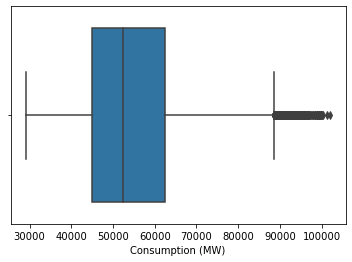

In [119]:
# Checking outliers in the dataset in the consumption column :

sns.boxplot(x=df['Consumption (MW)'])

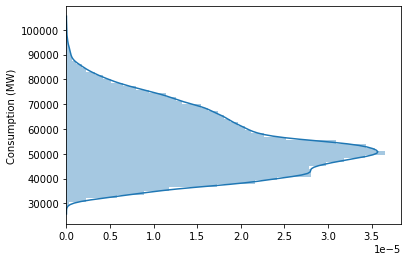

In [120]:
# inverse the y-axis to see the distribution of the consumption column :

sns.distplot(df['Consumption (MW)'], vertical=True)

In [121]:
# Describing the consumption column :
df['Consumption (MW)'].describe()

count    182592.000000
mean      54108.497316
std       12030.402916
min       29124.000000
25%       44947.000000
50%       52437.000000
75%       62389.250000
max      102098.000000
Name: Consumption (MW), dtype: float64

In [122]:
# Showing the rows where the consumption is greater than 80000 MW :

df[df['Consumption (MW)'] > 80000]

,Datetime,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Hydroelectric (MW),Pumped storage (MW),Bioenergy (MW),Physical exchanges (MW),CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW)
3777,2013-11-22 10:00:00,2013,11,22,10,4,80582.0,454.0,4097.0,6005.0,...,12872.0,-14.0,772.0,42.0,89.0,-1711.0,1000.0,-1532.0,-882.0,3611.0
3782,2013-11-22 18:30:00,2013,11,22,18,4,81911.0,687.0,3988.0,5961.0,...,13908.0,-7.0,785.0,938.0,90.0,-1999.0,1000.0,-1672.0,229.0,3704.0
3784,2013-11-22 19:30:00,2013,11,22,19,4,81148.0,1147.0,4096.0,5973.0,...,12830.0,-7.0,794.0,629.0,96.0,-1997.0,549.0,-1867.0,-63.0,4453.0
3895,2013-11-28 12:30:00,2013,11,28,12,3,80240.0,437.0,3381.0,6102.0,...,9692.0,-7.0,770.0,4250.0,86.0,-22.0,1000.0,-74.0,497.0,3186.0
3982,2013-12-03 08:30:00,2013,12,3,8,1,81570.0,906.0,3793.0,6724.0,...,12450.0,-8.0,768.0,2590.0,96.0,1999.0,199.0,-2186.0,-1746.0,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364560,2020-01-20 18:30:00,2020,1,20,18,0,80159.0,118.0,949.0,8975.0,...,13268.0,-13.0,1128.0,1330.0,57.0,-394.0,1900.0,-1758.0,661.0,1344.0
364561,2020-01-20 19:00:00,2020,1,20,19,0,82057.0,121.0,987.0,9055.0,...,14897.0,-13.0,1131.0,1410.0,56.0,-135.0,1800.0,-2455.0,-305.0,2287.0
364572,2020-01-21 08:30:00,2020,1,21,8,1,82558.0,871.0,1015.0,9083.0,...,12885.0,-15.0,1115.0,2359.0,65.0,-1641.0,1000.0,-466.0,741.0,3269.0
364573,2020-01-21 09:00:00,2020,1,21,9,1,83007.0,804.0,1092.0,9059.0,...,13347.0,-15.0,1115.0,2238.0,64.0,-2000.0,1000.0,120.0,636.0,2721.0


In [123]:
# Create a new dataframe with the rows where the consumption is greater than 80000 MW :
df2 = df[df['Consumption (MW)'] > 80000]

df2.shape

(4224, 23)

In [124]:
# Min and max values of the consumption column :
df['Consumption (MW)'].min(), df['Consumption (MW)'].max()

(29124.0, 102098.0)

In [125]:
# Counting the number of rows where the consumption is lower than 40000 MW :

df[df['Consumption (MW)'] < 40000].shape

(20864, 23)

In [126]:
# Create a dataframe of the rows where the consumption is lower than 40000 MW :

df3 = df[df['Consumption (MW)'] < 40000]

df3.shape

(20864, 23)

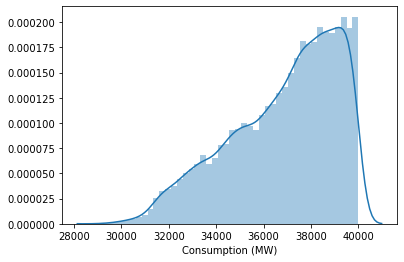

In [127]:
# Distribution of the consumption column in df3 :

sns.distplot(df3['Consumption (MW)'])

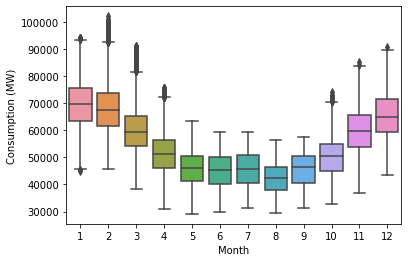

In [128]:
# Boxplot of the consumption column by month :

sns.boxplot(x=df['Month'], y=df['Consumption (MW)'])

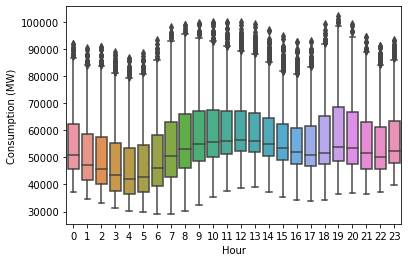

In [129]:
# Boxplot of the consumption column by hour :

sns.boxplot(x=df['Hour'], y=df['Consumption (MW)'])

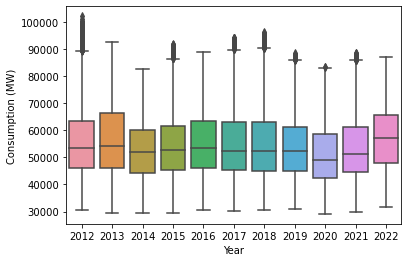

In [130]:
# Boxplot of the consumption column by year :

sns.boxplot(x=df['Year'], y=df['Consumption (MW)'])

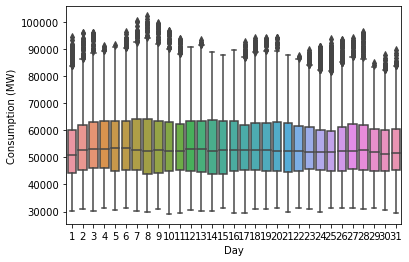

In [131]:
# Boxplot of the consumption column by day :

sns.boxplot(x=df['Day'], y=df['Consumption (MW)'])

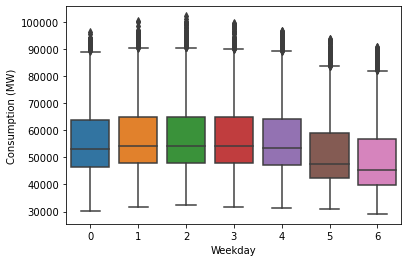

In [132]:
# Boxplot of the consumption column by weekday :

sns.boxplot(x=df['Weekday'], y=df['Consumption (MW)'])

The "3 sigma rule" is a common method for identifying outliers in a dataset. The rule states that if a data point is more than 3 standard deviations away from the mean of the dataset, then it can be considered an outlier.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182592 entries, 4 to 365183
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Datetime                           182592 non-null  datetime64[ns]
 1   Year                               182592 non-null  int64         
 2   Month                              182592 non-null  int64         
 3   Day                                182592 non-null  int64         
 4   Hour                               182592 non-null  int64         
 5   Weekday                            182592 non-null  int64         
 6   Consumption (MW)                   182592 non-null  float64       
 7   Fuel oil (MW)                      182592 non-null  float64       
 8   Coal (MW)                          182592 non-null  float64       
 9   Gas (MW)                           182592 non-null  float64       
 10  Nuclear (MW)        

We will check the outliers in a next step

## Checking Duplicates

In [147]:
# Checking duplicates in the dataset :

df.duplicated().sum()

0

In [148]:
# show wich rows are duplicated :
df[df.duplicated()]

,Datetime,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Hydroelectric (MW),Pumped storage (MW),Bioenergy (MW),Physical exchanges (MW),CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW)


In [149]:
# Drop duplicates :
df.drop_duplicates(inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182592 entries, 4 to 365183
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Datetime                           182592 non-null  datetime64[ns]
 1   Year                               182592 non-null  int64         
 2   Month                              182592 non-null  int64         
 3   Day                                182592 non-null  int64         
 4   Hour                               182592 non-null  int64         
 5   Weekday                            182592 non-null  int64         
 6   Consumption (MW)                   182592 non-null  float64       
 7   Fuel oil (MW)                      182592 non-null  float64       
 8   Coal (MW)                          182592 non-null  float64       
 9   Gas (MW)                           182592 non-null  float64       
 10  Nuclear (MW)        

In [152]:
df.shape

(182592, 23)

In [157]:
# Printing Datetime min and max values :
print(df['Datetime'].min())
print(df['Datetime'].max()) 
#2012-01-01 00:00:00
#2022-05-31 23:30:00

2012-01-01 00:00:00
2022-05-31 23:30:00


In [155]:
df.head(5)

,Datetime,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),Gas (MW),...,Hydroelectric (MW),Pumped storage (MW),Bioenergy (MW),Physical exchanges (MW),CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW)
4,2013-05-21 19:30:00,2013,5,21,19,1,58669.0,613.0,2002.0,1606.0,...,13889.0,-26.0,642.0,-5503.0,55.0,-1247.0,980.0,-2379.0,-1296.0,-1077.0
5,2013-05-21 20:30:00,2013,5,21,20,1,55731.0,842.0,1787.0,1629.0,...,12847.0,-25.0,638.0,-6928.0,56.0,-1500.0,809.0,-2466.0,-1798.0,-963.0
6,2013-05-21 21:00:00,2013,5,21,21,1,54522.0,734.0,1822.0,1527.0,...,11480.0,-25.0,639.0,-6643.0,56.0,-1500.0,-88.0,-2466.0,-1778.0,-1763.0
7,2013-05-22 00:00:00,2013,5,22,0,2,54841.0,343.0,1630.0,1082.0,...,11978.0,-25.0,650.0,-5097.0,47.0,-1500.0,-758.0,-2174.0,-888.0,-1155.0
9,2013-05-22 11:30:00,2013,5,22,11,2,60692.0,345.0,1984.0,1681.0,...,12976.0,-24.0,607.0,-3681.0,51.0,-1500.0,1000.0,-1945.0,-112.0,-695.0


## Exporting the Dataset to CSV

In [158]:
# Exporting the dataset to a csv file :
df.to_csv('energy_consumption_france.csv', index=False)